In [6]:
import matplotlib.pyplot as plt 
import numpy as NP
import pandas as pd

In [7]:
# Read demographics data
df = pd.read_csv('demographics.csv')

In [13]:
df

,neighborhood,alone_hhld,bachelor_higher,bornstate,carfree,commutetime,disabled,disconnected,foreign,gross_rent_adj,...,rent_pct_nycha,rentvacrate,serious_viol_rate,sevcrowd,subway_share,tot_rt,total_viol_rate,unemprate,viol_rt,volume_al
0,astoria,0.359117,0.455153,0.402935,0.825572,39.061425,0.064606,0.057683,0.405162,1530.000000,...,0.105074,0.030799,13.680086,0.024917,0.856224,11.286989,74.617029,0.055604,5.028649,329.000000
1,bay-ridge-dyker-heights,0.308004,0.404180,0.510311,0.701905,44.842750,0.057631,0.050390,0.378792,1440.000000,...,0.000000,0.036878,20.736516,0.061370,0.930327,6.731410,98.155189,0.068094,1.783261,351.000000
2,bayside-little-neck,0.250030,0.410023,0.541561,0.416552,46.448258,0.052323,0.025243,0.400073,1630.000000,...,0.000000,0.034729,7.407407,0.011238,0.355568,6.999854,46.270928,0.027443,1.030653,649.000000
3,bedford-stuyvesant,0.317625,0.361438,0.563395,0.854159,42.420863,0.077484,0.076412,0.197258,1290.000000,...,0.190349,0.053346,61.923068,0.035844,0.998169,18.446253,285.398587,0.085270,8.190345,541.000000
4,belmont-east-tremont,0.322454,0.133811,0.501848,0.780558,44.043127,0.160835,0.077759,0.353205,970.000000,...,0.037405,0.032849,136.698172,0.055344,0.795958,17.858001,624.651379,0.116321,9.307297,130.000000
5,bensonhurst,0.215031,0.308968,0.400531,0.693741,46.002116,0.065645,0.035397,0.552464,1330.000000,...,0.000000,0.029324,21.657662,0.045512,0.972013,5.995131,110.288539,0.060519,2.038674,491.000000
6,borough-park,0.200741,0.289187,0.622453,0.691763,39.045075,0.077081,0.081426,0.291207,1440.000000,...,0.000000,0.026927,28.505183,0.085210,1.000000,5.057947,142.416803,0.051411,1.546645,416.000000
7,brownsville,0.426713,0.163167,0.567355,0.761979,45.707765,0.105941,0.124447,0.309316,970.000000,...,0.309735,0.049129,95.787651,0.027549,1.000000,17.879447,413.523580,0.140154,10.686034,159.000000
8,bushwick,0.273764,0.298001,0.450914,0.844378,39.798122,0.079381,0.079191,0.317459,1410.000000,...,0.041865,0.043913,101.060512,0.046415,1.000000,14.089884,389.335785,0.073711,5.948470,302.000000
9,central-harlem,0.443324,0.370467,0.519169,0.898865,38.388715,0.101952,0.096136,0.252943,990.000000,...,0.157084,0.046549,63.743051,0.021260,1.000000,17.775205,299.542928,0.081233,8.883282,260.000000


In [52]:
manhattan_df = pd.DataFrame({'neighborhood':['lower-east-side-chinatown','financial-district','upper-west-side','central-harlem',\
                             'airport','clinton-chelsea','east-harlem','midtown','stuyvesant-town-turtle-bay',\
                             'greenwich-village-soho','morningside-heights-hamilton','washington-heights-inwood',\
                             'upper-east-side']})
# manhattan_data = df.join(manhattan_df, on='neighborhood')
data_manh = pd.merge(df, manhattan_df, on='neighborhood')
labels = data_manh['neighborhood'].values
data_manh

,neighborhood,alone_hhld,bachelor_higher,bornstate,carfree,commutetime,disabled,disconnected,foreign,gross_rent_adj,...,rent_pct_nycha,rentvacrate,serious_viol_rate,sevcrowd,subway_share,tot_rt,total_viol_rate,unemprate,viol_rt,volume_al
0,central-harlem,0.443324,0.370467,0.519169,0.898865,38.388715,0.101952,0.096136,0.252943,990.000000,...,0.157084,0.046549,63.743051,0.021260,1.000000,17.775205,299.542928,0.081233,8.883282,260.000000
1,clinton-chelsea,0.591151,0.781225,0.335886,0.906396,26.175891,0.062490,0.037559,0.309825,2230.000000,...,0.037423,0.049582,20.406476,0.024382,1.000000,23.265049,81.907030,0.033425,4.736307,511.000000
2,east-harlem,0.363710,0.343960,0.573306,0.887381,34.263561,0.132346,0.084491,0.234050,880.000000,...,0.352521,0.031114,62.633019,0.038137,0.989088,16.123010,312.557008,0.072521,8.588428,154.000000
3,financial-district,0.451268,0.801471,0.383600,0.886308,25.633044,0.034582,0.009831,0.226532,2530.000000,...,0.000000,0.043694,4.570739,0.032174,1.000000,17.580111,16.515027,0.039233,2.246712,640.000000
4,greenwich-village-soho,0.451268,0.801471,0.383600,0.886308,25.633044,0.034582,0.009831,0.226532,2530.000000,...,0.000000,0.043694,24.540657,0.032174,1.000000,25.417704,106.459406,0.039233,3.666015,407.000000
5,lower-east-side-chinatown,0.501964,0.431508,0.374730,0.870194,32.774167,0.078547,0.040978,0.363116,1050.000000,...,0.239759,0.033532,29.267156,0.033436,0.890318,14.698947,137.583181,0.055613,4.544425,137.000000
6,midtown,0.591151,0.781225,0.335886,0.906396,26.175891,0.062490,0.037559,0.309825,2230.000000,...,0.000000,0.049582,6.582432,0.024382,1.000000,94.323922,46.568813,0.033425,11.379250,475.000000
7,morningside-heights-hamilton,0.355280,0.448703,0.408019,0.903473,37.221276,0.076757,0.038900,0.317097,1240.000000,...,0.107973,0.041701,100.441402,0.033678,1.000000,10.953509,463.742005,0.073519,4.818818,93.000000
8,stuyvesant-town-turtle-bay,0.571642,0.800192,0.411577,0.913570,26.305623,0.044648,0.055265,0.220569,2530.000000,...,0.009126,0.046182,8.167574,0.021643,0.985221,10.802480,45.301330,0.033180,1.835441,528.000000
9,upper-east-side,0.465065,0.808537,0.477334,0.829521,32.543969,0.041147,0.020695,0.236640,2250.000000,...,0.030676,0.046571,14.206920,0.018507,0.879426,8.562204,69.432837,0.033834,1.054929,734.000000


(array([ 2.,  4.,  3.,  1.,  0.,  1.,  0.,  0.,  1.,  1.]),
 array([ 125195. ,  136551.4,  147907.8,  159264.2,  170620.6,  181977. ,
         193333.4,  204689.8,  216046.2,  227402.6,  238759. ]),
 <a list of 10 Patch objects>)

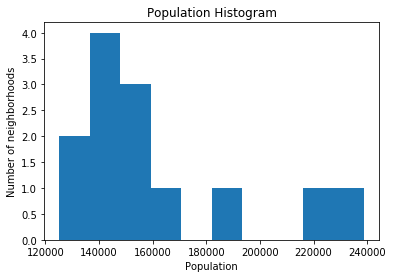

In [35]:
# POPULATION HISTOGRAM
plt.title('Population Histogram')
plt.xlabel('Population')
plt.ylabel('Number of neighborhoods')

plt.hist(data_manh['population'])

## PCA

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans

In [36]:
# Remove string columns
df_pca = data_manh.drop(['neighborhood'], axis=1)

In [37]:
# Standardize Data
data = df_pca.values

scaler = StandardScaler()
data = scaler.fit_transform(data)

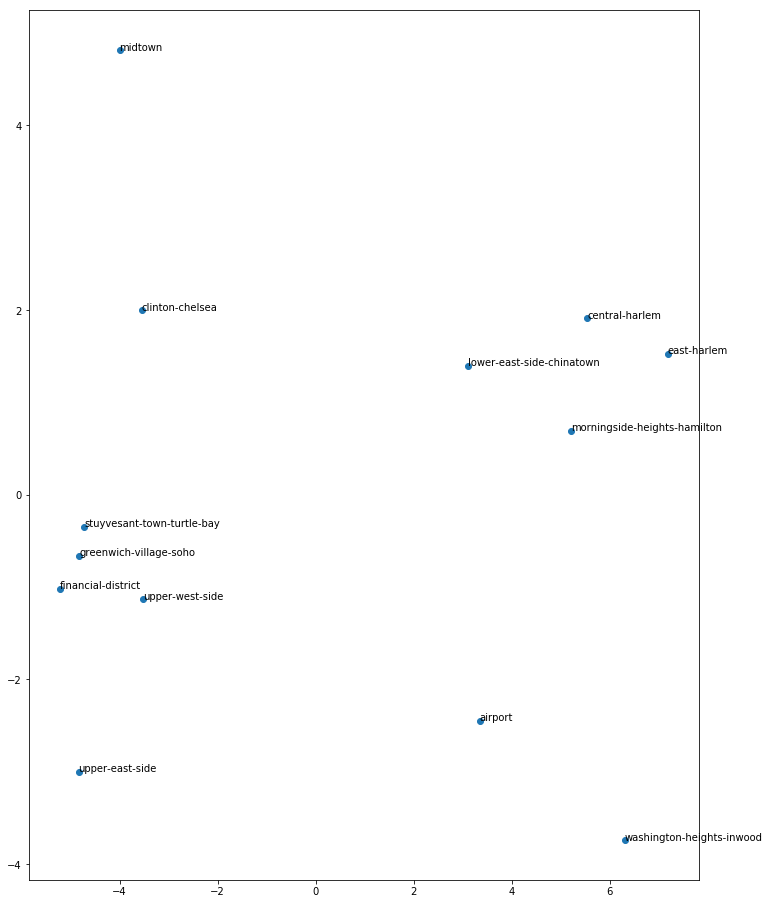

In [40]:
# Visualize 2-D PCA
def plot_points(X, labels):
    plt.figure(figsize=(12,16))
    plt.scatter(X[:,0],X[:,1])
    for i, txt in enumerate(labels):
            plt.annotate(txt, (X[i,0],X[i,1]))
    plt.show()
        
# plot PCA                                                                                                                       
pca = PCA(n_components=2)
pca.fit(data)
X_PCA = pca.transform(data)
plot_points(X_PCA,labels)

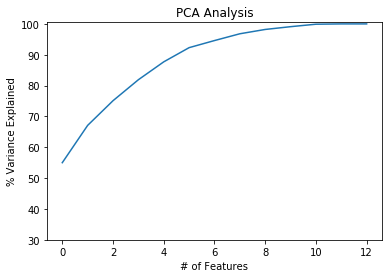

In [41]:
# Compute principal components
covar_matrix = PCA(n_components = 24)
covar_matrix.fit(data)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios                                         

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features                                                          

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')

plt.plot(var)

In [42]:
# Try PCA with known-correlated variables (Sanity test)
data_corr = df_pca[['bachelor_higher', 'gross_rent_adj', 'medhhincome_adj', 'medhhincome_rent_adj',\
                          'park_share', 'povrate', 'prof_pct_math', 'prof_pct_ela', 'pwhite']]
data_corr = data_corr.values
scaler = StandardScaler()
data_corr = scaler.fit_transform(data_corr)

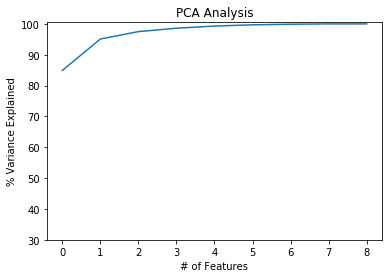

In [43]:
# Compute principal components
covar_matrix = PCA(n_components = 9)
covar_matrix.fit(data_corr)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios                                         

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features                                                          

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')

plt.plot(var)

## Clustering

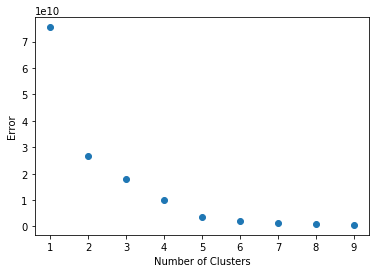

In [45]:
# Elbow method
max_cluster = 10
error = np.zeros((1,max_cluster))
x_pts = np.zeros((1,max_cluster))
for i in range(1,max_cluster):
    data = df_pca.values
    km = KMeans(n_clusters=i)
    km.fit(data)
    x_pts[0,i] = i
    error[0,i] = km.inertia_
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.scatter(x_pts[0,1:], error[0,1:])

In [51]:
# K-means
num_clusters = 3
data = df_pca.values
km = KMeans(n_clusters=num_clusters)
km.fit(data)
print(km.labels_)
for i in range(num_clusters):
        print(labels[km.labels_==i])

[1 0 1 2 2 1 0 1 0 2 2 1 1]
['clinton-chelsea' 'midtown' 'stuyvesant-town-turtle-bay']
['central-harlem' 'east-harlem' 'lower-east-side-chinatown'
 'morningside-heights-hamilton' 'washington-heights-inwood' 'airport']
['financial-district' 'greenwich-village-soho' 'upper-east-side'
 'upper-west-side']


## Hierarchical Clustering

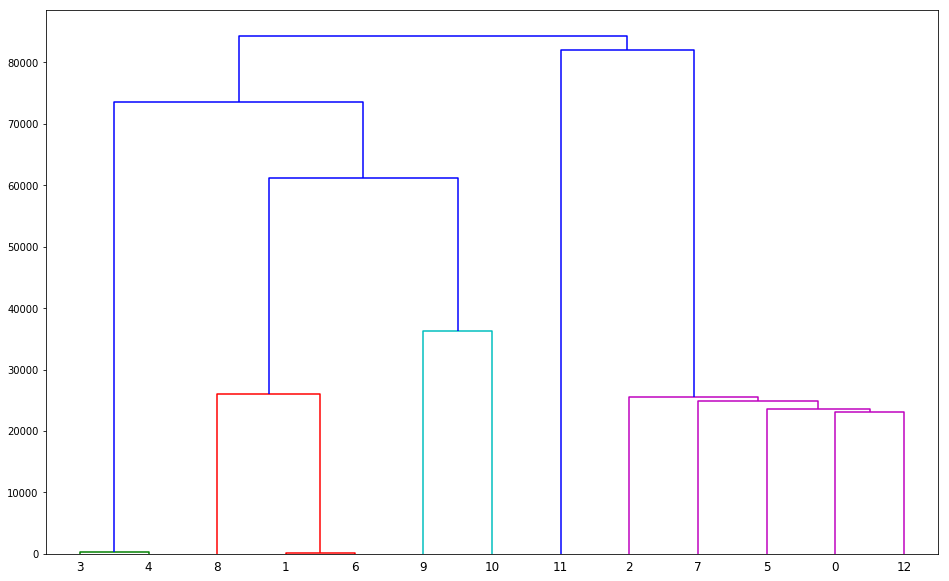

In [48]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

data = df_pca.values
Z = hierarchy.linkage(pdist(data), 'single')
plt.figure(figsize=(16,10))
dn = hierarchy.dendrogram(Z)

In [49]:
for i in range(labels.shape[0]):
    print (i, labels[i])

0 central-harlem
1 clinton-chelsea
2 east-harlem
3 financial-district
4 greenwich-village-soho
5 lower-east-side-chinatown
6 midtown
7 morningside-heights-hamilton
8 stuyvesant-town-turtle-bay
9 upper-east-side
10 upper-west-side
11 washington-heights-inwood
12 airport
